In [2]:
import collections
import math

import matplotlib.pyplot as plt
import numpy as np
import rich
from tqdm import tqdm

import auto_curriculum

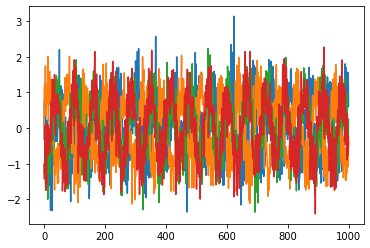

In [50]:
N_STEPS = 1000
N_ARMS = 4
arms = []
for _ in range(N_ARMS):
    arm_fn = lambda t: (1 / 2) * np.random.randn(*t.shape) + np.sin(t / 10 + 10 * np.random.randn())
    arms.append(arm_fn(np.arange(N_STEPS)))

for arm in arms:
    plt.plot(arm)

In [54]:
def pick(mab, arms, step):
        choice = mab.get()
        reward = arms[choice][step]
        mab.update(choice, reward)
        return reward

overall_winner = collections.defaultdict(int)

for _ in tqdm(range(1000)):
    mabs = dict(
        second_egreedy_3   =auto_curriculum.NSEpsilonGreedy(len(arms), auto_curriculum.EMA, dict(alpha=0.8, default=2),   0.1),
        second_egreedy_4   =auto_curriculum.NSEpsilonGreedy(len(arms), auto_curriculum.EMA, dict(alpha=0.8, default=1.5), 0.1),
        second_egreedy_5   =auto_curriculum.NSEpsilonGreedy(len(arms), auto_curriculum.EMA, dict(alpha=0.8, default=1),   0.1),
        second_egreedy_6   =auto_curriculum.NSEpsilonGreedy(len(arms), auto_curriculum.EMA, dict(alpha=0.8, default=.5),   0.1),
        second_egreedy_7   =auto_curriculum.NSEpsilonGreedy(len(arms), auto_curriculum.EMA, dict(alpha=0.8, default=0),   0.1),
        second_egreedy_8   =auto_curriculum.NSEpsilonGreedy(len(arms), auto_curriculum.EMA, dict(alpha=0.8, default=-.5),   0.1),
    )
    mabs_rewards = {k: 0 for k in mabs}
    optimal_reward = 0.
    for t in range(N_STEPS):
        for k, mab in mabs.items():
            mabs_rewards[k] += pick(mab, arms, t)
        optimal_reward += np.max([arm[t] for arm in arms])
    
    # Select the winner, handling ties by marking all of them as winners
    max_val = max(mabs_rewards.values())
    for k, v in mabs_rewards.items():
        overall_winner[k] += np.isclose(v, max_val)

rich.print(overall_winner)
rich.print(np.sum(list(overall_winner.values())))

100%|██████████| 1000/1000 [01:13<00:00, 13.55it/s]


defaultdict(<class 'int'>, {
    'second_egreedy_3': 169,
    'second_egreedy_4': 152,
    'second_egreedy_5': 164,
    'second_egreedy_6': 144,
    'second_egreedy_7': 206,
    'second_egreedy_8': 165
})

1000